# Лабораторная работа №1

## Разведочный анализ данных. Исследование и визуализация данных.

### **Цель рабораторной работы:** изучение различных методов визуализации данных.

### 1. Текстовое описание набора данных:
В данной лабораторной работе используется dataset *"Diabetes dataset"*.

В наборе данных имеются следующие данные:
1. Возраст (age)
2. Пол (sex)
3. ИМТ &ndash; индекс массы тела (bmi)
4. Кровяное давление (bp)
5. Содержание холестерина (s1)
6. Липопротеины низкой плотности (s2)
7. Липопротеины высокой плотности (s3)
8. Содержание холестерина ЛПВП (s4)
9. Уровень триглицеридов (s5)
10. Уровень сахара в крови (s6)
11. Мера прогрессирования заболевания спустя год (y)

Импортируем библиотеки:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

Загрузим файлы датасета:

In [2]:
data = pd.read_table('https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt')
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


### 2. Основные характеристики набора данных

Размер датасета:

In [3]:
print(data.shape)

(442, 11)


Атрибуты и их типы значений:

In [4]:
print(data.dtypes)

AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object


Проверим наличие пустых значений &ndash; пробежим в цикле по всем колонкам.

In [5]:
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, null_count))

AGE - 0
SEX - 0
BMI - 0
BP - 0
S1 - 0
S2 - 0
S3 - 0
S4 - 0
S5 - 0
S6 - 0
Y - 0


Основные статистические характеристики набора данных:

In [6]:
print(data.describe())

              AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               S3          S4          S5          S6           Y  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  152.133484  
std     12.934202    1.290450    0.522391   11.496335   77.093005 

Определим уникальные значения для целевого признака:

In [9]:
data['Y'].unique()

array([151,  75, 141, 206, 135,  97, 138,  63, 110, 310, 101,  69, 179,
       185, 118, 171, 166, 144, 168,  68,  49, 245, 184, 202, 137,  85,
       131, 283, 129,  59, 341,  87,  65, 102, 265, 276, 252,  90, 100,
        55,  61,  92, 259,  53, 190, 142, 155, 225, 104, 182, 128,  52,
        37, 170,  71, 163, 150, 160, 178,  48, 270, 111,  42, 200, 113,
       143,  51, 210, 134,  98, 164,  96, 162, 279,  83, 302, 198,  95,
       232,  81, 246, 297, 258, 229, 275, 281, 173, 180,  84, 121, 161,
        99, 109, 115, 268, 274, 158, 107, 103, 272, 280, 336, 317, 235,
        60, 174, 126, 288,  88, 292, 197, 186,  25, 195, 217, 172, 214,
        70, 220, 152,  47,  74, 295, 127, 237,  64,  79,  91, 116,  86,
       122,  72,  39, 196, 222, 277,  77, 191,  73, 263, 248, 296,  78,
        93, 208, 108, 154, 124,  67, 257, 262, 177, 187, 125, 215, 303,
       243, 153, 346,  89,  50, 308, 145,  45, 264, 241,  66,  94, 230,
       181, 156, 233, 219,  80, 332,  31, 236, 253,  44, 114, 14

Как мы видим, целевой признак принимает различные целые значения

### 3. Визуальное исследование набора данных
#### Половая статистика распределения показателя болезни

<AxesSubplot:xlabel='SEX', ylabel='Y'>

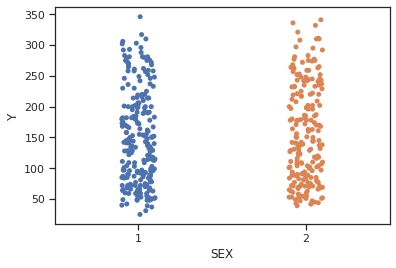

In [17]:
sns.stripplot(x = 'SEX', y = 'Y', data = data)

В данном случае, отследить зависимость показателя заболевания от пола невозможно.
#### Зависимость целевого признака от уровня сахара в крови

<AxesSubplot:xlabel='S6', ylabel='Y'>

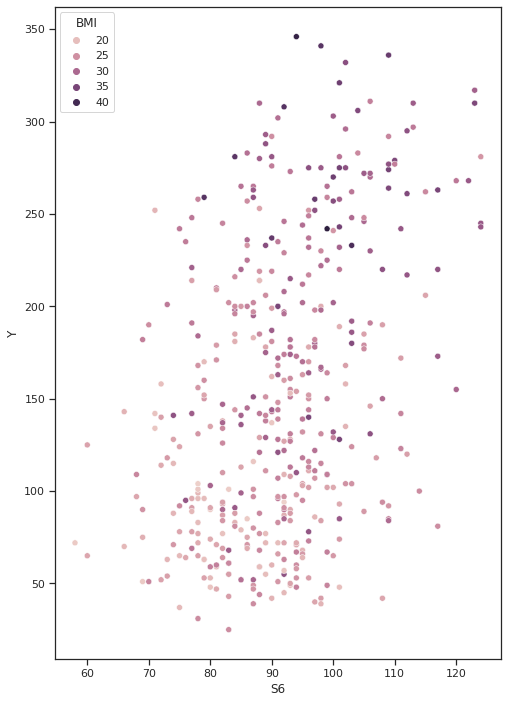

In [19]:
fig, ax = plt.subplots(figsize=(8, 12))
sns.scatterplot(ax = ax, x = 'S6', y = 'Y', hue='BMI', data = data)

В данном случае можно заметить, что более выраженная мера прогрессирования заболевания характерна для людей с избыточным весом (ИМТ > 25).

Рассмотрим распределение по уровню сахара в крови:

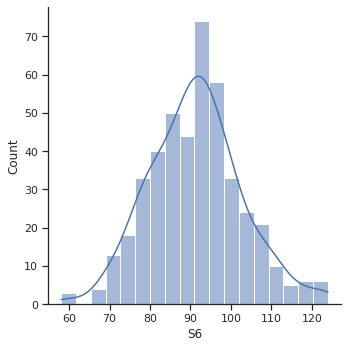

In [20]:
sns.displot(data = data, x = 'S6', kde = True)

По ИМТ с разделением по полу:

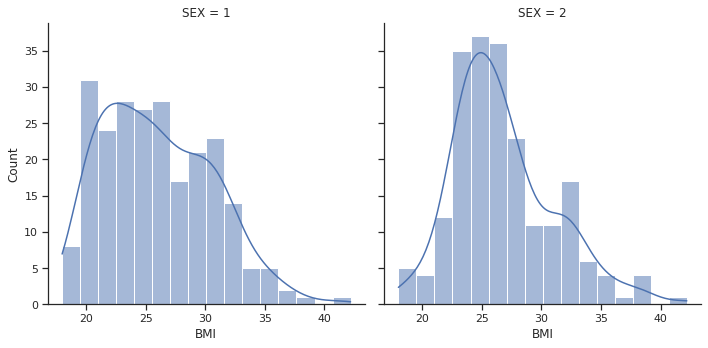

In [21]:
sns.displot(data = data, x = 'BMI', kde = True, col = 'SEX')

#### Парные диаграммы

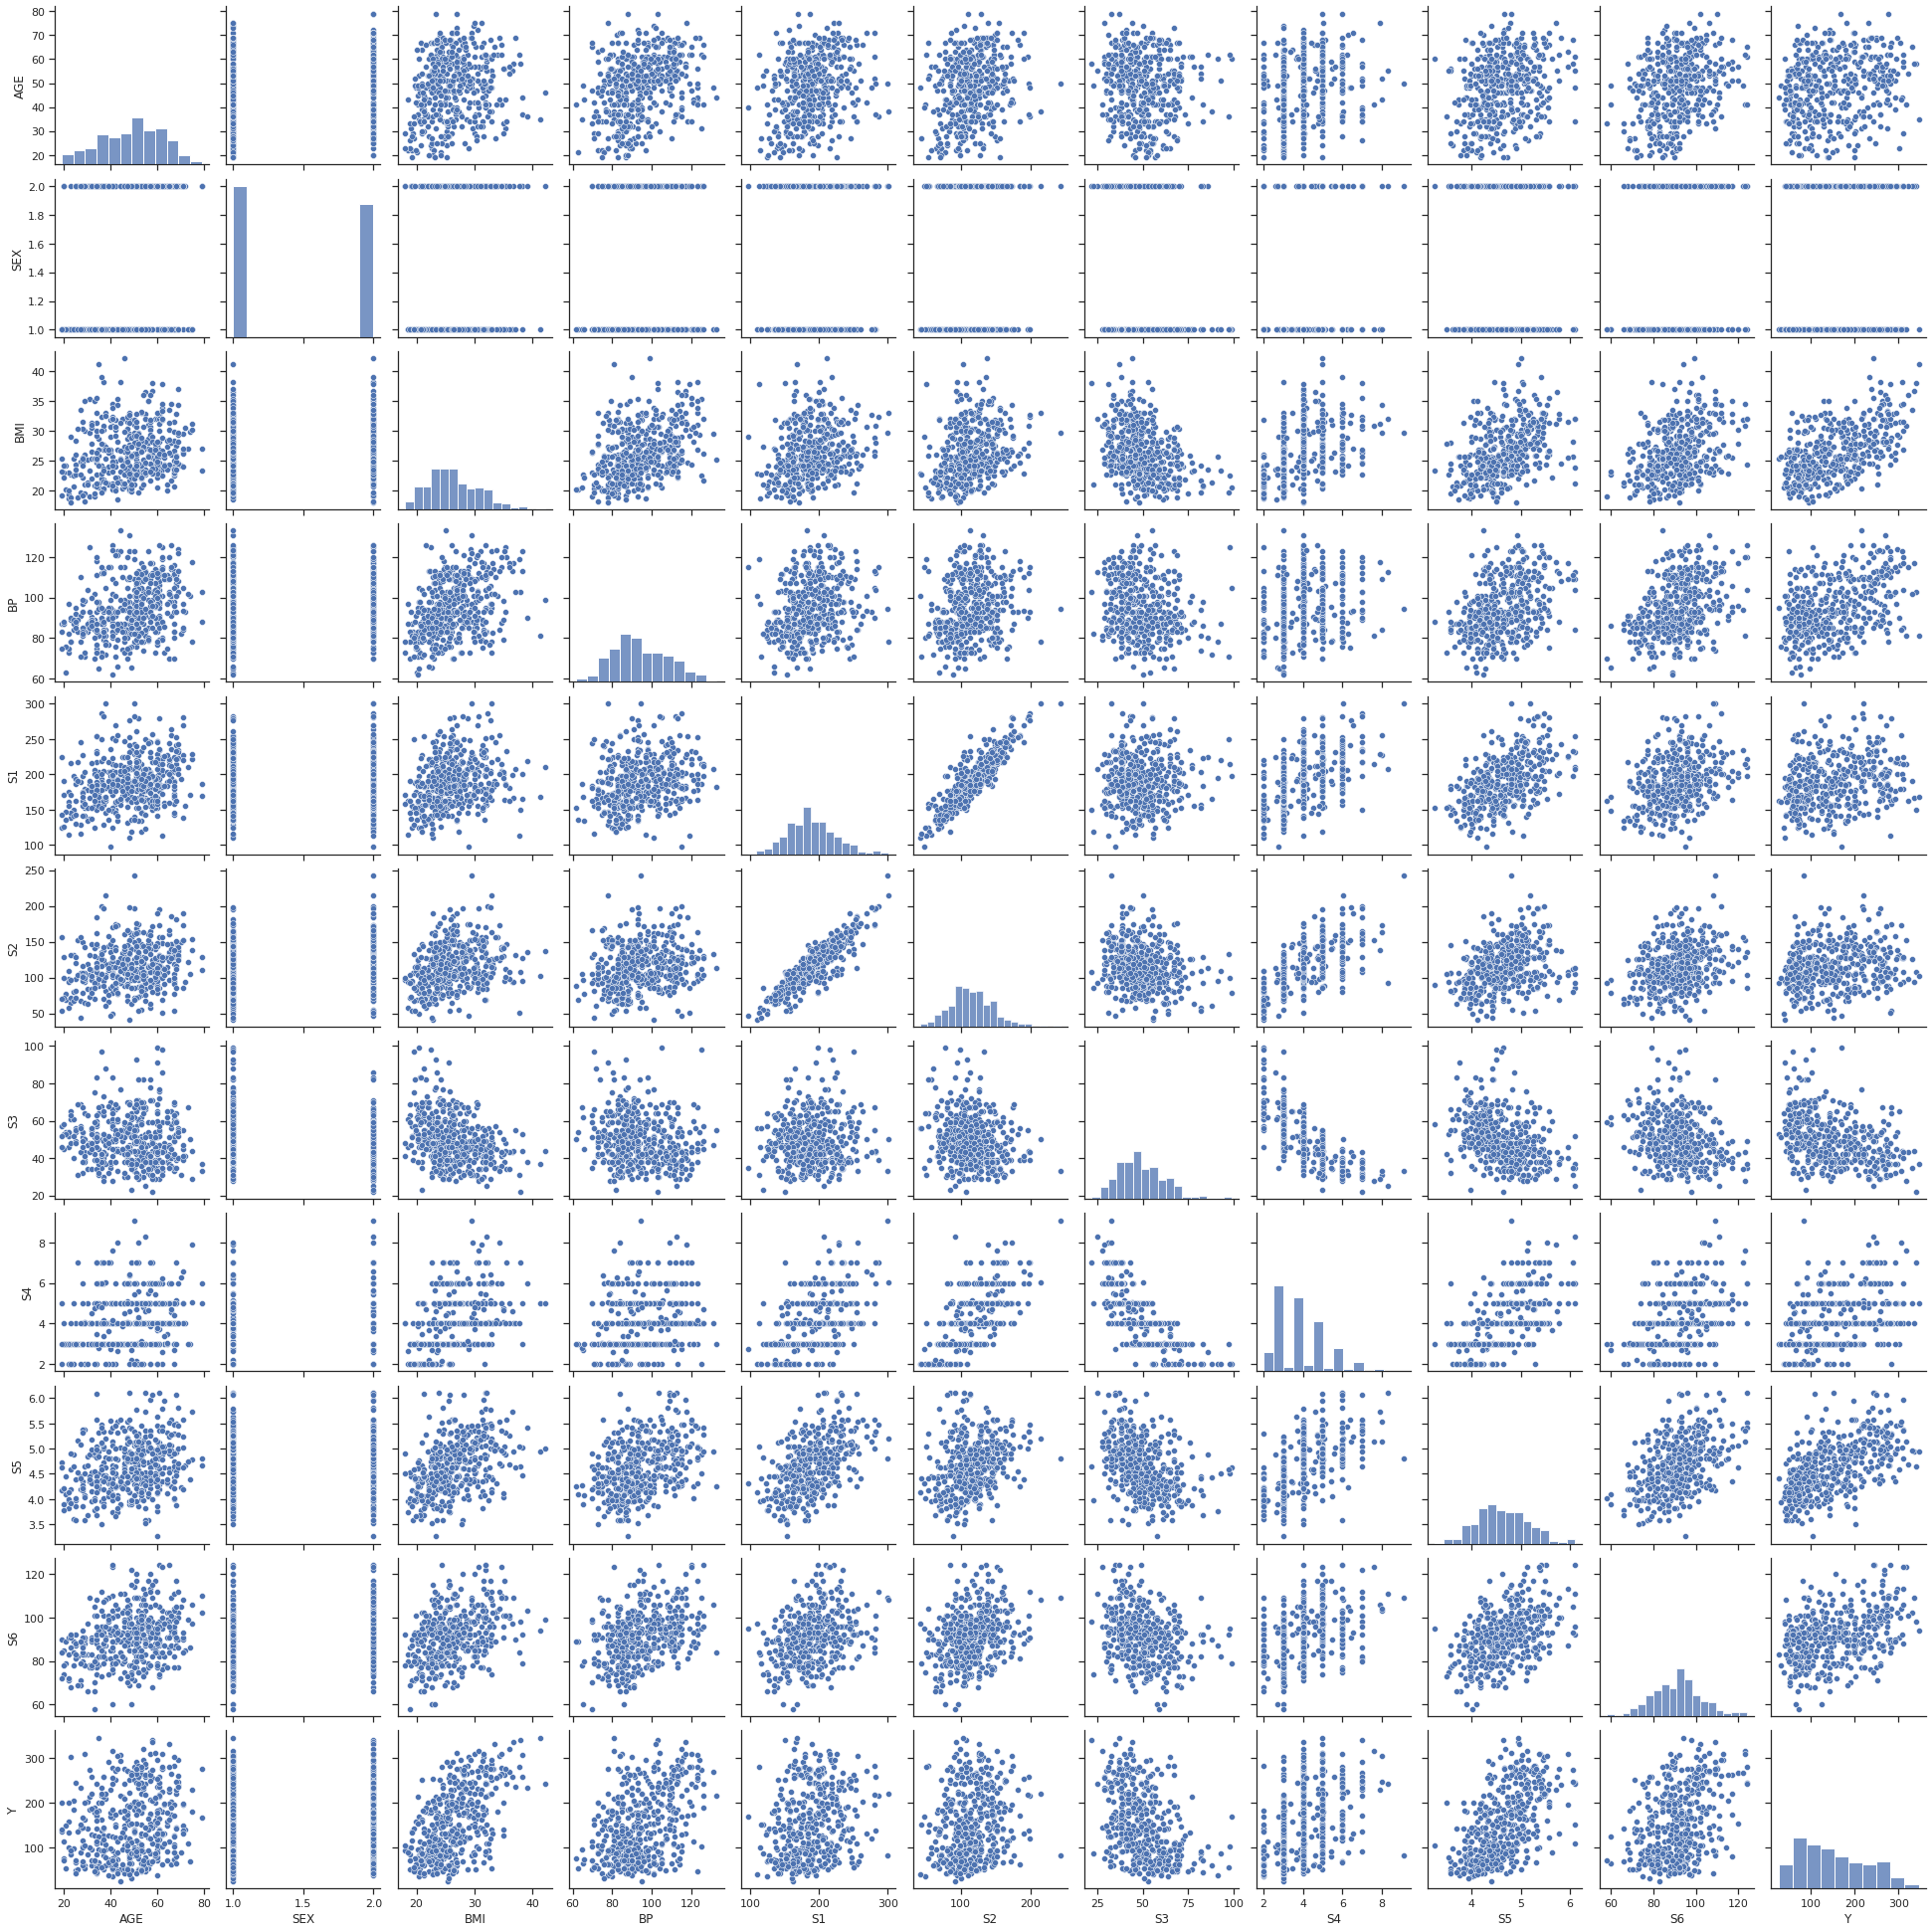

In [22]:
sns.pairplot(data)

### 4. Информация о корреляции признаков
Рассмотрим корреляционную матрицу:

In [23]:
data.corr()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


Исходя из таблицы, можно заметить, что с целевым признаком (мера прогрессирования заболевания) больше всего коррелируют:
- индекс массы тела (BMI)
- уровень триглицеридов (S5)
- кровяное давление (BP) и уровень холестерина ЛПВП (S4)

Попробуем составить корреляционные таблицы на основе коэффициентов корреляции Кедалла и Спирмена:

In [24]:
data.corr(method = 'kendall')

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.146580,0.136535,0.242111,0.182220,0.153612,-0.073846,0.160898,0.180544,0.201784,0.130709
SEX,0.146580,1.000000,0.080424,0.215733,0.022809,0.110208,-0.326188,0.297335,0.143172,0.168199,0.030630
BMI,0.136535,0.080424,1.000000,0.281770,0.194171,0.198583,-0.249831,0.335625,0.344720,0.266373,0.391195
BP,0.242111,0.215733,0.281770,1.000000,0.188067,0.140253,-0.131014,0.205948,0.268863,0.264566,0.289352
S1,0.182220,0.022809,0.194171,0.188067,1.000000,0.717229,0.010695,0.393367,0.356268,0.227139,0.154016
S2,0.153612,0.110208,0.198583,0.140253,0.717229,1.000000,-0.133332,0.503579,0.242250,0.194082,0.129665
S3,-0.073846,-0.326188,-0.249831,-0.131014,0.010695,-0.133332,1.000000,-0.638633,-0.311775,-0.200545,-0.278884
S4,0.160898,0.297335,0.335625,0.205948,0.393367,0.503579,-0.638633,1.000000,0.485410,0.307397,0.324734
S5,0.180544,0.143172,0.344720,0.268863,0.356268,0.242250,-0.311775,0.485410,1.000000,0.316235,0.408988
S6,0.201784,0.168199,0.266373,0.264566,0.227139,0.194082,-0.200545,0.307397,0.316235,1.000000,0.239051


In [25]:
data.corr(method = 'spearman')

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.177463,0.200554,0.350859,0.262524,0.221711,-0.106973,0.221017,0.265176,0.296235,0.197822
SEX,0.177463,1.000000,0.098079,0.261508,0.027790,0.134695,-0.394584,0.337524,0.174625,0.203277,0.037401
BMI,0.200554,0.098079,1.000000,0.397985,0.287829,0.295494,-0.371172,0.459068,0.491609,0.384664,0.561382
BP,0.350859,0.261508,0.397985,1.000000,0.275224,0.205638,-0.191033,0.280799,0.396071,0.381219,0.416241
S1,0.262524,0.027790,0.287829,0.275224,1.000000,0.878793,0.015308,0.520674,0.512864,0.332173,0.232429
S2,0.221711,0.134695,0.295494,0.205638,0.878793,1.000000,-0.197435,0.652283,0.349947,0.286483,0.195834
S3,-0.106973,-0.394584,-0.371172,-0.191033,0.015308,-0.197435,1.000000,-0.789694,-0.450420,-0.290863,-0.410022
S4,0.221017,0.337524,0.459068,0.280799,0.520674,0.652283,-0.789694,1.000000,0.640390,0.413700,0.448931
S5,0.265176,0.174625,0.491609,0.396071,0.512864,0.349947,-0.450420,0.640390,1.000000,0.453023,0.589416
S6,0.296235,0.203277,0.384664,0.381219,0.332173,0.286483,-0.290863,0.413700,0.453023,1.000000,0.350792


Как и ожидалось, существенных различий от использования коэффициента корреляции Пирсона нет.